### download csv from here
https://www.kaggle.com/alopez247/pokemon

In [37]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [38]:
df = pd.read_csv('../datasets/pokemon_alopez247.csv',index_col='Number')

In [39]:
df.head()

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 721 entries, 1 to 721
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              721 non-null    object 
 1   Type_1            721 non-null    object 
 2   Type_2            350 non-null    object 
 3   Total             721 non-null    int64  
 4   HP                721 non-null    int64  
 5   Attack            721 non-null    int64  
 6   Defense           721 non-null    int64  
 7   Sp_Atk            721 non-null    int64  
 8   Sp_Def            721 non-null    int64  
 9   Speed             721 non-null    int64  
 10  Generation        721 non-null    int64  
 11  isLegendary       721 non-null    bool   
 12  Color             721 non-null    object 
 13  hasGender         721 non-null    bool   
 14  Pr_Male           644 non-null    float64
 15  Egg_Group_1       721 non-null    object 
 16  Egg_Group_2       191 non-null    object 
 1

In [41]:
df.columns.tolist()

['Name',
 'Type_1',
 'Type_2',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp_Atk',
 'Sp_Def',
 'Speed',
 'Generation',
 'isLegendary',
 'Color',
 'hasGender',
 'Pr_Male',
 'Egg_Group_1',
 'Egg_Group_2',
 'hasMegaEvolution',
 'Height_m',
 'Weight_kg',
 'Catch_Rate',
 'Body_Style']

In [42]:
df = df[['isLegendary','Generation', 'Type_1', 'Type_2', 'HP', 'Attack', 'Defense', 'Sp_Atk', 'Sp_Def', 'Speed','Color','Egg_Group_1','Height_m','Weight_kg','Body_Style']]

In [43]:
df

,isLegendary,Generation,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Color,Egg_Group_1,Height_m,Weight_kg,Body_Style
Number,,,,,,,,,,,,,,,
1,False,1,Grass,Poison,45,49,49,65,65,45,Green,Monster,0.71,6.9,quadruped
2,False,1,Grass,Poison,60,62,63,80,80,60,Green,Monster,0.99,13.0,quadruped
3,False,1,Grass,Poison,80,82,83,100,100,80,Green,Monster,2.01,100.0,quadruped
4,False,1,Fire,NaN,39,52,43,60,50,65,Red,Monster,0.61,8.5,bipedal_tailed
5,False,1,Fire,NaN,58,64,58,80,65,80,Red,Monster,1.09,19.0,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,True,6,Dark,Flying,126,131,95,131,98,99,Red,Undiscovered,5.79,203.0,two_wings
718,True,6,Dragon,Ground,108,100,121,81,95,95,Green,Undiscovered,5.00,305.0,serpentine_body
719,True,6,Rock,Fairy,50,100,150,100,150,50,Pink,Undiscovered,0.71,8.8,head_arms


In [44]:
df['isLegendary'] = df['isLegendary'].astype(int)

In [45]:
df

,isLegendary,Generation,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Color,Egg_Group_1,Height_m,Weight_kg,Body_Style
Number,,,,,,,,,,,,,,,
1,0,1,Grass,Poison,45,49,49,65,65,45,Green,Monster,0.71,6.9,quadruped
2,0,1,Grass,Poison,60,62,63,80,80,60,Green,Monster,0.99,13.0,quadruped
3,0,1,Grass,Poison,80,82,83,100,100,80,Green,Monster,2.01,100.0,quadruped
4,0,1,Fire,NaN,39,52,43,60,50,65,Red,Monster,0.61,8.5,bipedal_tailed
5,0,1,Fire,NaN,58,64,58,80,65,80,Red,Monster,1.09,19.0,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,1,6,Dark,Flying,126,131,95,131,98,99,Red,Undiscovered,5.79,203.0,two_wings
718,1,6,Dragon,Ground,108,100,121,81,95,95,Green,Undiscovered,5.00,305.0,serpentine_body
719,1,6,Rock,Fairy,50,100,150,100,150,50,Pink,Undiscovered,0.71,8.8,head_arms


In [46]:
df.describe(include='all')

,isLegendary,Generation,Type_1,Type_2,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Color,Egg_Group_1,Height_m,Weight_kg,Body_Style
count,721.000000,721.000000,721,350,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721,721,721.000000,721.000000,721
unique,NaN,NaN,18,18,NaN,NaN,NaN,NaN,NaN,NaN,10,15,NaN,NaN,14
top,NaN,NaN,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,Blue,Field,NaN,NaN,bipedal_tailed
freq,NaN,NaN,105,87,NaN,NaN,NaN,NaN,NaN,NaN,134,169,NaN,NaN,158
mean,0.063800,3.323162,NaN,NaN,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,NaN,NaN,1.144979,56.773370,NaN
std,0.244566,1.669873,NaN,NaN,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,NaN,NaN,1.044369,89.095667,NaN
min,0.000000,1.000000,NaN,NaN,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,NaN,NaN,0.100000,0.100000,NaN
25%,0.000000,2.000000,NaN,NaN,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,NaN,NaN,0.610000,9.400000,NaN
50%,0.000000,3.000000,NaN,NaN,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,NaN,NaN,0.990000,28.000000,NaN
75%,0.000000,5.000000,NaN,NaN,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,NaN,NaN,1.400000,61.000000,NaN


In [47]:
pd.get_dummies(df['Color']) # we will use this

,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
Number,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
717,0,0,0,0,0,0,0,1,0,0
718,0,0,0,1,0,0,0,0,0,0
719,0,0,0,0,0,1,0,0,0,0


In [48]:
def dummy_creator(df,cols):
    for col in cols:
        df_dummy = pd.get_dummies(df[col])
        df = pd.concat([df,df_dummy],axis=1)
        df = df.drop(col,axis=1)
    return df

In [49]:
cleandf =  dummy_creator(df,['Color','Egg_Group_1','Body_Style','Type_1','Type_2'])

In [50]:
cleandf

,isLegendary,Generation,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Number,,,,,,,,,,,,,,,,,,,,,
1,0,1,45,49,49,65,65,45,0.71,6.9,...,0,0,0,0,0,1,0,0,0,0
2,0,1,60,62,63,80,80,60,0.99,13.0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,80,82,83,100,100,80,2.01,100.0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,39,52,43,60,50,65,0.61,8.5,...,0,0,0,0,0,0,0,0,0,0
5,0,1,58,64,58,80,65,80,1.09,19.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,1,6,126,131,95,131,98,99,5.79,203.0,...,0,0,0,0,0,0,0,0,0,0
718,1,6,108,100,121,81,95,95,5.00,305.0,...,0,0,1,0,0,0,0,0,0,0
719,1,6,50,100,150,100,150,50,0.71,8.8,...,0,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = cleandf.iloc[:,1:]
y = cleandf.iloc[:,0]
print(X.shape)
print(y.shape)

(721, 84)
(721,)


In [53]:
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(X)

In [54]:
trainx, testx, trainy, testy = train_test_split(x,y) 

# simple ANN model

In [55]:
inputshape =   trainx.shape[1]

In [56]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(500,activation='relu',input_shape=(inputshape,)))
model.add(tf.keras.layers.Dense(2,activation='softmax'))

In [57]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               42500     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1002      
Total params: 43,502
Trainable params: 43,502
Non-trainable params: 0
_________________________________________________________________


In [59]:
history = model.fit(x=trainx,y=trainy,epochs=100,validation_data=(testx,testy))

Epoch 1/100
17/17 [==============================] - 1s 32ms/step - loss: 0.4750 - accuracy: 0.8239 - val_loss: 0.2792 - val_accuracy: 0.9337
Epoch 2/100
17/17 [==============================] - 0s 8ms/step - loss: 0.2895 - accuracy: 0.9051 - val_loss: 0.2153 - val_accuracy: 0.9392
Epoch 3/100
17/17 [==============================] - 0s 8ms/step - loss: 0.1860 - accuracy: 0.9460 - val_loss: 0.1844 - val_accuracy: 0.9392
Epoch 4/100
17/17 [==============================] - 0s 8ms/step - loss: 0.2014 - accuracy: 0.9238 - val_loss: 0.1615 - val_accuracy: 0.9448
Epoch 5/100
17/17 [==============================] - 0s 9ms/step - loss: 0.1482 - accuracy: 0.9474 - val_loss: 0.1448 - val_accuracy: 0.9503
Epoch 6/100
17/17 [==============================] - 0s 8ms/step - loss: 0.1292 - accuracy: 0.9610 - val_loss: 0.1317 - val_accuracy: 0.9613
Epoch 7/100
17/17 [==============================] - 0s 8ms/step - loss: 0.1269 - accuracy: 0.9541 - val_loss: 0.1208 - val_accuracy: 0.9613
Epoch 8/100


In [60]:
loss_val,accuracy_val = model.evaluate(testx,testy)
print(loss_val)
print(accuracy_val)

6/6 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9724
0.044925522059202194
0.9723756909370422


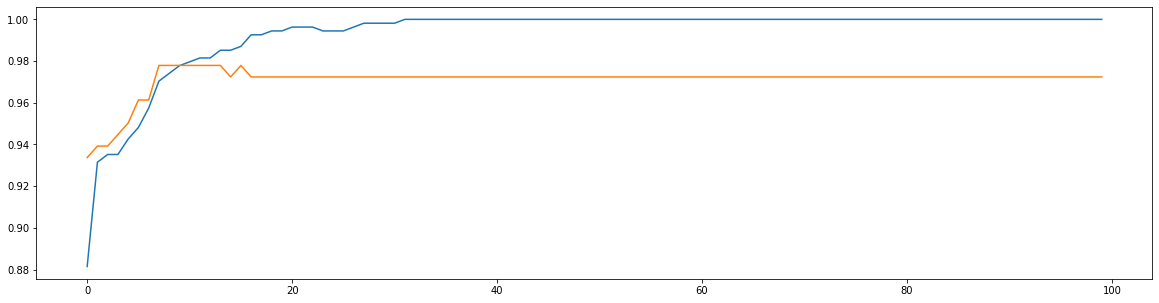

In [61]:
plt.figure(figsize=(20,5))
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='test accuracy')
plt.show()

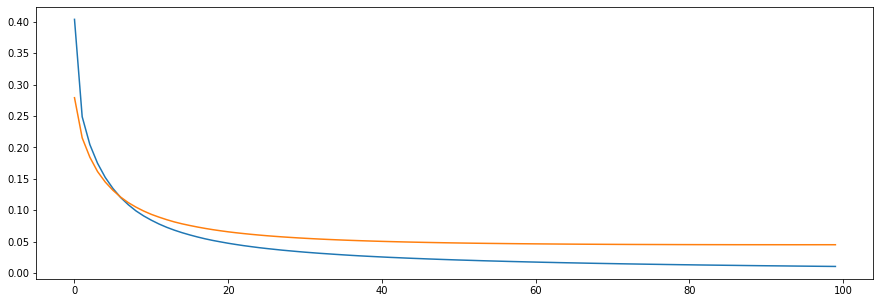

In [62]:
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='test loss')
plt.show()

In [63]:
model.save('../models/pokemon_islegendary_predictor_model.h5')

In [64]:
inpf = X.loc[[721]]

In [65]:
inpf

,Generation,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Height_m,Weight_kg,Black,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Number,,,,,,,,,,,,,,,,,,,,,
721,6,80,110,120,130,90,70,1.7,195.0,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
inp = scaler.transform(inpf)

In [67]:
out = model.predict(inp)

In [68]:
np.argmax(out)

1

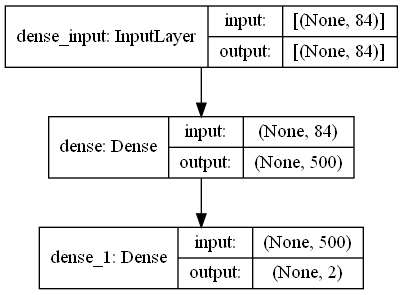

In [70]:
tf.keras.utils.plot_model(model,show_shapes=True,expand_nested=True)